<a href="https://colab.research.google.com/github/SetarehForoozan/MachineLearning_Physics/blob/master/Assignment2_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, requests, zipfile
from zipfile import ZipFile
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Ridge, SGDClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.pipeline import make_pipeline
from collections import Counter

In [0]:
#I couldn't read data from the site given in lectures, so I downloaded file, extracted it, then read it from my desktop
data = pd.read_csv('pid-5M.csv')
data.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


In [0]:
targets = list(set(data['id']))

target_freq = [dict( Counter(data['id'])  )[i] for i in targets]
features = list( data.columns[ 1:] )

data['target'] = data['id'].apply(lambda x: targets.index(x)) 
data.drop('id',axis=1, inplace=True)

data = data[ (data['target']==1) | (data['target']==2) ].copy()
X = data.drop('target',axis=1)
Y = data['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 1)

In [0]:
l1_clf = SGDClassifier(penalty='l1')
l1_clf.fit(X_train,Y_train)
print('SGD l1 gives a score of {} on training data and \n {} on test data.'.format(l1_clf.score(X_train, Y_train),l1_clf.score(X_test, Y_test)))
print("clf coeeficients: {}, intercept:{} ".format(l1_clf.coef_, l1_clf.intercept_))

SGD l1 gives a score of 0.9827855770398801 on training data and 
 0.9828088717869734 on test data.
clf coeeficients: [[   5.96981789   -5.15380595 -123.03641329    0.            0.
     1.17211727]], intercept:[103.99430225] 


In [0]:
l2_clf = SGDClassifier(penalty='l2')
l2_clf.fit(X_train,Y_train)
print('SGD l2 gives a score of {} on training data and \n {} on test data.'.format(l2_clf.score(X_train, Y_train),l2_clf.score(X_test, Y_test)))
print("clf coeeficients: {}, intercept:{} ".format(l2_clf.coef_, l2_clf.intercept_))

SGD l2 gives a score of 0.9776906285322167 on training data and 
 0.9776463152189373 on test data.
clf coeeficients: [[ 1.35593179e+00 -1.21158415e+00 -2.48247496e+01 -5.49834225e-02
   2.44419904e-02  3.77607819e-01]], intercept:[20.9994061] 


In [0]:
els_clf = SGDClassifier(penalty='elasticnet')
els_clf.fit(X_train,Y_train)
print('SGD l1 gives a score of {} on training data and \n {} on test data.'.format(els_clf.score(X_train, Y_train),els_clf.score(X_test, Y_test)))
print("clf coeeficients: {}, intercept:{} ".format(els_clf.coef_, els_clf.intercept_))

SGD l1 gives a score of 0.9793607033335007 on training data and 
 0.9793346243932902 on test data.
clf coeeficients: [[ 1.35905664e+00 -1.16010340e+00 -2.46196996e+01 -2.48310291e-02
   5.89442448e-03  3.80766730e-01]], intercept:[20.80564539] 


In [0]:
alphas = np.arange(0.0001,0.0016,0.0001)
label_list = list(X)
print(label_list)

['p', 'theta', 'beta', 'nphe', 'ein', 'eout']


In [0]:
#l1
i = -1
coef_l1 = np.ones((len(label_list), len(alphas)))
for alpha in alphas:
    i += 1
    clf=SGDClassifier(alpha = alpha ,penalty = 'l1')
    clf.fit(X_train, Y_train) 
    coef_l1[:, i] = clf.coef_
print(coef_l1)

[[ 5.90343702e+00  3.95046795e+00  3.11859695e+00  2.58802861e+00
   2.24019395e+00  2.27748177e+00  2.01428732e+00  1.85330208e+00
   1.82521765e+00  1.70159199e+00  1.66214790e+00  1.58311926e+00
   1.57021939e+00  1.57030898e+00  1.48739197e+00]
 [-5.17370299e+00 -3.19235316e+00 -2.43300389e+00 -1.97888989e+00
  -1.69940552e+00 -1.69479156e+00 -1.48328685e+00 -1.35571668e+00
  -1.31283668e+00 -1.21374929e+00 -1.16851906e+00 -1.09045382e+00
  -1.06722004e+00 -1.05829920e+00 -9.76745567e-01]
 [-1.22991071e+02 -8.08321511e+01 -6.27007904e+01 -5.15423514e+01
  -4.40416139e+01 -4.48301330e+01 -3.89611859e+01 -3.55878010e+01
  -3.47398538e+01 -3.21587131e+01 -3.11389032e+01 -2.92026125e+01
  -2.87983714e+01 -2.88336359e+01 -2.66314938e+01]
 [-4.60611254e-02 -2.81462693e-02  0.00000000e+00 -3.20222910e-02
  -7.05205104e-03  0.00000000e+00 -3.68211315e-02 -2.23942638e-02
   0.00000000e+00 -2.98420907e-03 -1.02001584e-02 -1.25412619e-02
  -1.33775893e-02 -1.39939378e-02 -1.67030127e-02]
 [ 0

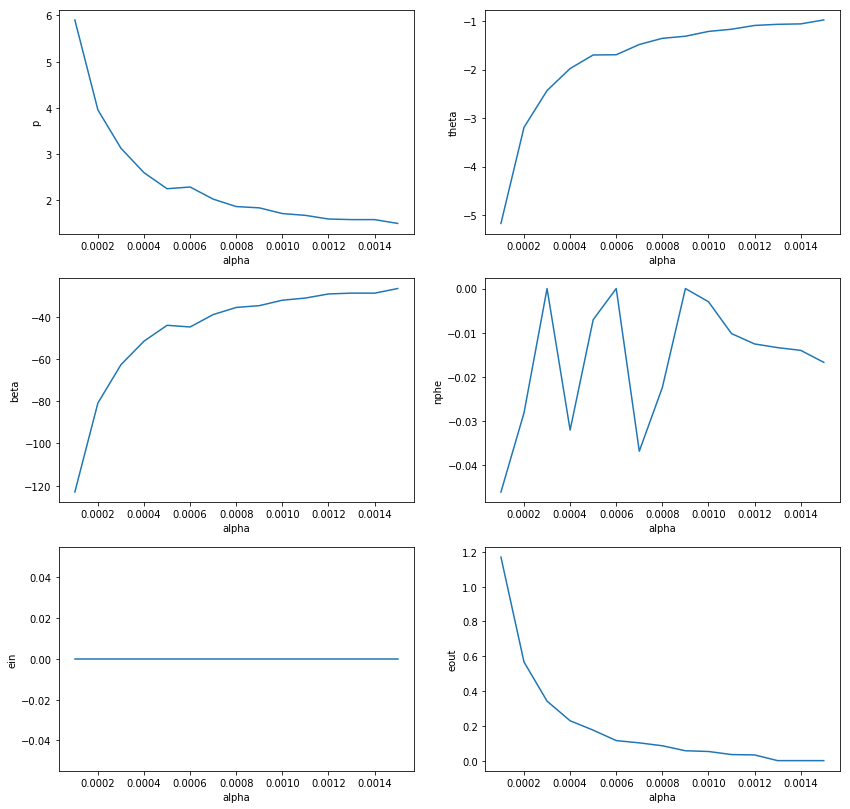

In [0]:
i = -1
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14, 14), sharey=False)
for label in label_list:
    i += 1
    axi = eval('ax' + str(i + 1))
    axi.plot(alphas, coef_l1[i,:])
    axi.set_xlabel('alpha')
    axi.set_ylabel(label_list[i])
#plt.tight_layout()
plt.show()

In [0]:
# l2
i = -1
coef_l2=np.ones((len(label_list), len(alphas)))
for alpha in alphas:
    i += 1
    clf = SGDClassifier(alpha = alpha, penalty = 'l2')
    clf.fit(X_train, Y_train)
    coef_l2[:, i] = clf.coef_
print(coef_l2)

[[ 1.35247353e+00  1.18795845e+00  1.09455865e+00  1.04670902e+00
   1.01541183e+00  9.87888117e-01  9.76855079e-01  9.54877715e-01
   9.29465613e-01  9.28880943e-01  9.25372168e-01  9.09450189e-01
   9.02676431e-01  8.98631276e-01  8.87405883e-01]
 [-1.22404469e+00 -1.01018126e+00 -9.11643186e-01 -8.62777062e-01
  -8.19410087e-01 -7.80228446e-01 -7.40564672e-01 -7.13517709e-01
  -6.86060797e-01 -6.57870453e-01 -6.47272674e-01 -6.31426103e-01
  -6.09131143e-01 -5.93393625e-01 -5.78936545e-01]
 [-2.48197937e+01 -2.05301818e+01 -1.83443819e+01 -1.68950659e+01
  -1.58317890e+01 -1.49992950e+01 -1.43141035e+01 -1.37360701e+01
  -1.32460161e+01 -1.28076913e+01 -1.24328529e+01 -1.20901645e+01
  -1.17798173e+01 -1.14983624e+01 -1.12411248e+01]
 [-3.25412092e-02 -3.64694261e-03 -2.37520904e-02 -6.03156358e-03
  -3.36646438e-03 -1.15021113e-02 -8.01542138e-03 -3.85742633e-03
   2.49369224e-04  9.53838063e-04 -4.18260829e-03 -7.48109238e-03
  -4.14337634e-03 -2.80541231e-03 -1.10720316e-02]
 [ 3

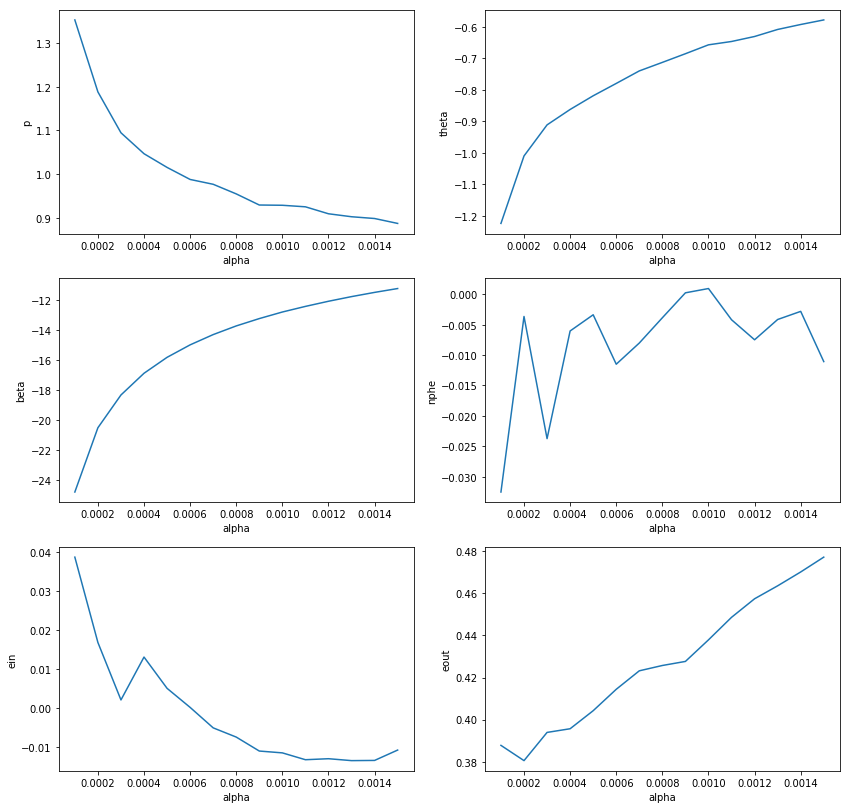

In [0]:
i = -1
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14, 14), sharey=False)
for label in label_list:
    i += 1
    axi = eval('ax' + str(i + 1))
    axi.plot(alphas, coef_l2[i,:])
    axi.set_xlabel('alpha')
    axi.set_ylabel(label_list[i])
#plt.tight_layout()
plt.show()

In [0]:
#elastic
i = -1
coef_el=np.ones((len(label_list), len(alphas)))
for alpha in alphas:
    i += 1
    clf=SGDClassifier(alpha=alpha, penalty='elasticnet')
    clf.fit(X_train, Y_train)
    coef_el[:, i] = clf.coef_
print(coef_el)

[[ 1.33551029e+00  1.18156407e+00  1.11886322e+00  1.08452409e+00
   1.03042053e+00  1.01800960e+00  9.87705504e-01  9.71064970e-01
   9.51494045e-01  9.42788554e-01  9.35444510e-01  9.26704462e-01
   9.15841952e-01  9.14274937e-01  9.11258085e-01]
 [-1.15287122e+00 -1.00185058e+00 -9.28903442e-01 -8.70400524e-01
  -8.25941074e-01 -7.88573283e-01 -7.56075797e-01 -7.30388382e-01
  -7.07688222e-01 -6.79293145e-01 -6.64037402e-01 -6.46442352e-01
  -6.26561989e-01 -6.12096532e-01 -5.99227165e-01]
 [-2.46221694e+01 -2.09329474e+01 -1.88820126e+01 -1.74725606e+01
  -1.64216678e+01 -1.55867907e+01 -1.49001190e+01 -1.43163513e+01
  -1.38267644e+01 -1.33783877e+01 -1.29860357e+01 -1.26326770e+01
  -1.23144239e+01 -1.20305341e+01 -1.17674486e+01]
 [-3.23013941e-02 -7.03604704e-03 -6.40778363e-03 -1.00695931e-02
  -5.03289913e-03 -2.66819972e-02  0.00000000e+00 -1.74206772e-02
  -7.88189215e-03 -3.60126284e-03  0.00000000e+00 -3.05014480e-03
  -1.13143400e-02 -2.34618863e-03  0.00000000e+00]
 [ 0

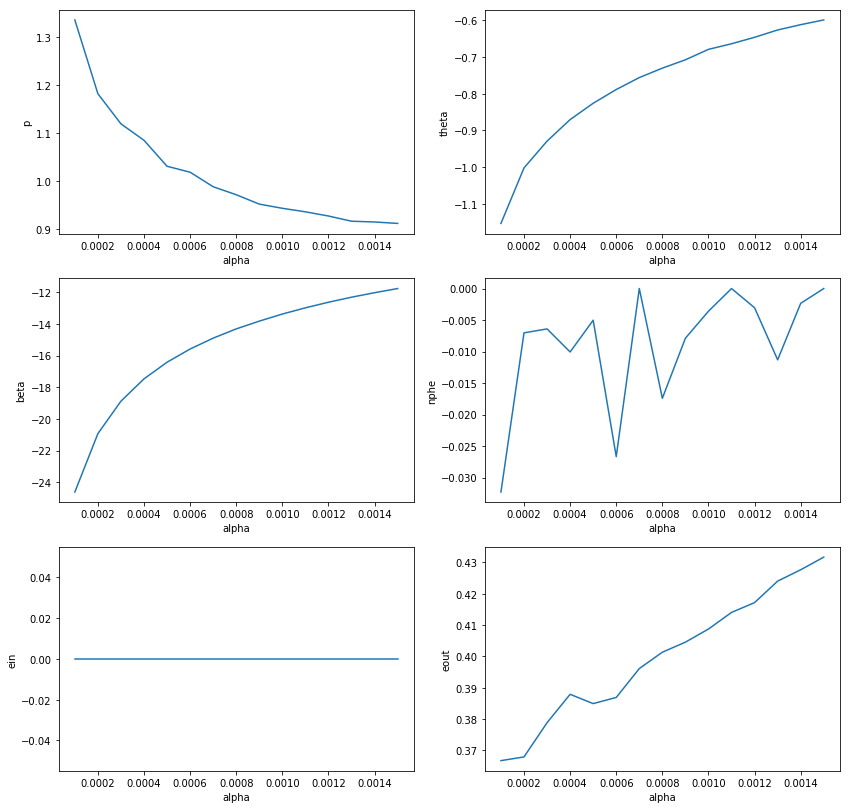

In [0]:
i = -1
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(14, 14), sharey=False)
for label in label_list:
    i += 1
    axi = eval('ax' + str(i + 1))
    axi.plot(alphas, coef_el[i,:])
    axi.set_xlabel('alpha')
    axi.set_ylabel(label_list[i])
#plt.tight_layout()
plt.show()